In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('wineQT.csv')

In [5]:
print(data.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [9]:
X = data.drop('pH', axis=1)
y = data['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [12]:
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

In [13]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [14]:
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

In [15]:
print(f'Ridge MSE: {ridge_mse}')
print(f'Lasso MSE: {lasso_mse}')

Ridge MSE: 0.007914209454332048
Lasso MSE: 0.02924521618134461


In [17]:
from sklearn.svm import SVR

In [18]:
svm_regressor = SVR(kernel='rbf') 
svm_regressor.fit(X_train, y_train)

SVR()

In [19]:
svm_predictions = svm_regressor.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)

In [20]:
print(f'SVM MSE: {svm_mse}')

SVM MSE: 0.007014984620141704


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

In [25]:
dt_regressor = DecisionTreeRegressor()  # You can set hyperparameters for the regressor if needed
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
y_pred = dt_regressor.predict(X_test)

In [29]:
decision_tree_mse = mean_squared_error(y_test, y_pred)

In [28]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.010256331877729258


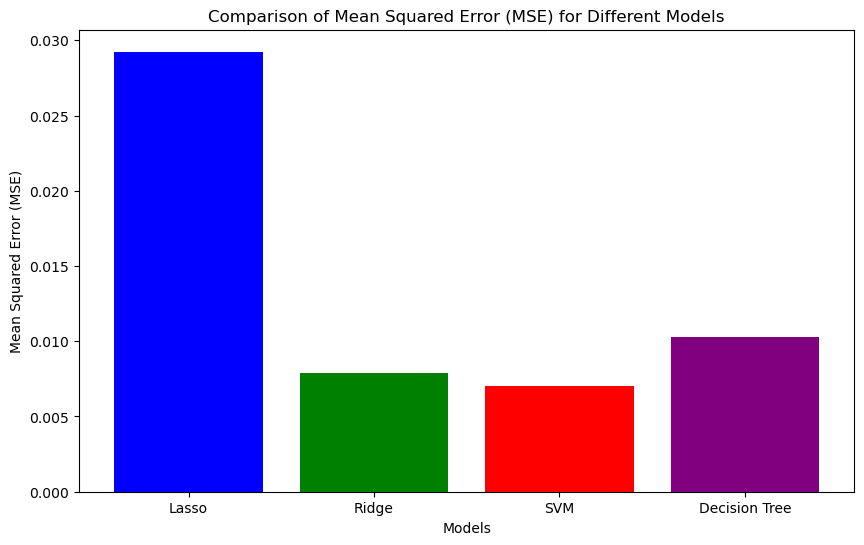

In [30]:
models = ['Lasso', 'Ridge', 'SVM', 'Decision Tree']
mse_values = [lasso_mse, ridge_mse, svm_mse, decision_tree_mse]
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.show()
